Test the import

In [1]:
from pymongo import MongoClient

Let's create our Mongo Client, using the port that we specified in our ssh tunnel

In [2]:
client = MongoClient(port=12345) # this is the port set by the SSH tunnel
db = client.new_cool_db

In [4]:
# print collection names
print(db.list_collection_names())

['testData']


This is the data we added when we were playing around

In [5]:
col = db.testData
col

# print each document
for x in col.find():
     print(x)

{'_id': ObjectId('5bdb382c7f331e9bf65d90d5'), 'name': 'Eddie'}
{'_id': ObjectId('5bdb38317f331e9bf65d90d6'), 'name': 'Felicity'}
{'_id': ObjectId('5bdb38377f331e9bf65d90d7'), 'nationality': 'British'}
{'_id': ObjectId('5bdb38e97f331e9bf65d90d8'), 'x': 1.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90d9'), 'x': 2.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90da'), 'x': 3.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90db'), 'x': 4.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90dc'), 'x': 5.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90dd'), 'x': 6.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90de'), 'x': 7.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90df'), 'x': 8.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90e0'), 'x': 9.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90e1'), 'x': 10.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90e2'), 'x': 11.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90e3'), 'x': 12.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90e4'), 'x': 13.0}
{'_id': ObjectId('5bdb38e97f331e9bf65d90e5'), 'x': 14.0}
{'_id': Ob

### Bring in the heavy metal movies data

Let's now bring in the heavy metal movies data. It is contained in the `heavy_metal.parsed.pkl.zip` file. Let's unzip that data **in your home folder** so that it doesn't mess things up for git.

In [8]:
!ls

mongodb_remote.ipynb


In [6]:
challenges_data_path = '/home/spencer/projects/Metis/sea18_ds6/challenges/challenges_data'

!cp {challenges_data_path}/heavy_metal_parsed.pkl.zip ~
!unzip ~/heavy_metal_parsed.pkl.zip -d ~

Archive:  /home/spencer/heavy_metal_parsed.pkl.zip
  inflating: /home/spencer/heavy_metal_parsed.pkl  


### Load the dataset and explore

In [9]:
import pickle as pkl
with open('/home/spencer/projects/Metis/deliverables-metis/mongodb_practice/heavy_metal_parsed.pkl', 'rb') as infile:
    reviews = pkl.load(infile)

In [10]:
reviews[0].keys()

dict_keys(['raw', 'head', 'metal_cred', 'title', 'direct', 'solid_metal_nuggets', 'cast', 'the_meat', 'year', 'sections'])

In [23]:
reviews[0]

{'raw': ['200 MOTELS (1971)',
  'DIRECTORS: Tony Palmer, Frank Zappa',
  'CAST: Frank Zappa, Ringo Starr, Mark Volman, Howard Kaylan, Keith\nMoon',
  'METAL CRED',
  'Frank Zappa',
  'Nun Desecration',
  'THE MEAT',
  'Beyond his metal sainthood for\nbattling the censor-witches of the PMRC and getting named checked by Deep\nPurple in “Smoke on the Water”, musical visionary Frank Zappa led many rock\nfans to heavy metal.',
  'And, from there, he led many metal\nfans to the outer expanses of rock’s possibilities.',
  'Zappa also opened countless banging\nheads to the far reaches of jazz, classical, doo-wop, and any other art form\nthat could involve (brilliant) noise and (brilliantly dumb) dirty jokes.',
  '200\nMotels is Zappa’s first crack at major motion picture madness, and it\nembodies the much forgotten cultural moment when acid rock tumbled forever into\nthe black pits of rising heavy metal.',
  'Surrealistic sketches and\npsychedelic set pieces about the insanity of a being on to

In [16]:
len(reviews)

856

In [24]:
reviews[123]['title']

'CHIMAIRA: THE DEHUMANIZING PROCESS'

In [25]:
reviews[123]['the_meat']

['THE MEAT',
 'Cleveland groove-metal stompers\nChimaira practice relentlessly, play ruthlessly, and talk loud in the “video\nalbum” Chimaira: The Dehumanizing\nProcess.',
 'Between exceptionally\nwell-presented songs, band members recount their history, ruminate on their\nvarious processes, and sound off about their horror over being lumped in among\n“nü-metal” rap-rockers around the turn of the century.',
 'After each gripe, Chimaira launches\ninto a wall-of-hurt sound-storm in order to clarify the distance between what\nthey do and, say, Linkin Park.',
 'Point taken. Hard.']

### Add this data to our remote database

Let's start by adding one entry to the **collection** (table) `hmm` and analyzing.

In [26]:
hmm = client.new_cool_db.hmm
hmm.insert_one(reviews[0])

In [27]:
query = hmm.find()

query.next()

{'_id': ObjectId('5bdb3c2cfb0d277b43e9f770'),
 'raw': ['200 MOTELS (1971)',
  'DIRECTORS: Tony Palmer, Frank Zappa',
  'CAST: Frank Zappa, Ringo Starr, Mark Volman, Howard Kaylan, Keith\nMoon',
  'METAL CRED',
  'Frank Zappa',
  'Nun Desecration',
  'THE MEAT',
  'Beyond his metal sainthood for\nbattling the censor-witches of the PMRC and getting named checked by Deep\nPurple in “Smoke on the Water”, musical visionary Frank Zappa led many rock\nfans to heavy metal.',
  'And, from there, he led many metal\nfans to the outer expanses of rock’s possibilities.',
  'Zappa also opened countless banging\nheads to the far reaches of jazz, classical, doo-wop, and any other art form\nthat could involve (brilliant) noise and (brilliantly dumb) dirty jokes.',
  '200\nMotels is Zappa’s first crack at major motion picture madness, and it\nembodies the much forgotten cultural moment when acid rock tumbled forever into\nthe black pits of rising heavy metal.',
  'Surrealistic sketches and\npsychedelic 

In [28]:
query.next() # there is no next

StopIteration: 

Let's add the rest (it may take a while)

In [29]:
for review in reviews[1:]:
    hmm.insert_one(review)

In [31]:
# some basic exploration:
# lets see what one (the first) document looks like:
hmm.find_one()

{'_id': ObjectId('5bdb3c2cfb0d277b43e9f770'),
 'raw': ['200 MOTELS (1971)',
  'DIRECTORS: Tony Palmer, Frank Zappa',
  'CAST: Frank Zappa, Ringo Starr, Mark Volman, Howard Kaylan, Keith\nMoon',
  'METAL CRED',
  'Frank Zappa',
  'Nun Desecration',
  'THE MEAT',
  'Beyond his metal sainthood for\nbattling the censor-witches of the PMRC and getting named checked by Deep\nPurple in “Smoke on the Water”, musical visionary Frank Zappa led many rock\nfans to heavy metal.',
  'And, from there, he led many metal\nfans to the outer expanses of rock’s possibilities.',
  'Zappa also opened countless banging\nheads to the far reaches of jazz, classical, doo-wop, and any other art form\nthat could involve (brilliant) noise and (brilliantly dumb) dirty jokes.',
  '200\nMotels is Zappa’s first crack at major motion picture madness, and it\nembodies the much forgotten cultural moment when acid rock tumbled forever into\nthe black pits of rising heavy metal.',
  'Surrealistic sketches and\npsychedelic 

In [32]:
hmm.find_one({'year':2000})

{'_id': ObjectId('5bdb3c3ffb0d277b43e9f786'),
 'raw': ['ALMOST FAMOUS (2000)\nDIRECTOR: Cameron Crowe',
  'CAST: Patrick Fugit, Kate Hudson, Billy Crudup, Philip Seymour\nHoffman',
  'METAL CRED',
  '’70s Arena Rock',
  'Soundtrack: Black Sabbath, Deep\nPurple, Jethro Tull, Jimi Hendrix, Led Zeppelin, Lynyrd Skynrd, MC5, Stooges',
  'THE MEAT',
  'There is no film I hate quite like Almost Famous, meaning, of course, that\nthere is no film that I love like Almost\nFamous.',
  'It is a brilliant extension of its\ncreator, former Rolling Stone writer\nturned Say Anything and We Bought a Zoo filmmaker Cameron Crowe.',
  'In its brilliance, though, Almost Famous is a loathsome, cretinous\nthing of treacle and saccharine and mucus dressed up in denim and leather and\nbellbottoms. Again: just like Cameron.',
  'Set in 1974, Patrick Fugit stars as\nWilliam Miller, a fifteen-year-old rock fan and budding journalist who, inspired\nby Lester Bangs (Philip Seymour Hoffman), gets a crack at writing

In [35]:
hmm.estimated_document_count()  # this is the length of the collection.

856

### Challenge 14 (partial)

Let's work on a version of Challenge #14. Make a list of the years in the heavy metal data. How many heavy metal films came out in 1980?



In [36]:
eighty = 0
for film in hmm.find({"year":1980}):
    eighty += 1
print(eighty)

31


In [37]:
# same thing as above

eighty = len(list(hmm.find({"year": 1980})))    
print(eighty)

31


In [40]:
# same thing as above 

eighty = hmm.count_documents({"year": 1980})
print(eighty)

31


What is the frequency of metal movies by year?

In [62]:
cursor = hmm.aggregate([
    {"$group": {
        "_id": "$year",
        "year_count": {"$sum": 1} 
    }}
])


cursor.next()
# list(cursor)

{'_id': 1956, 'year_count': 1}

In [63]:
# Store into a python dictionary called histogram
histogram = {}
for res in cursor:
    year = res['_id']
    count = res['year_count']
    histogram[year] = count

In [64]:
for year in sorted(histogram.keys()):
    print(year, histogram[year])

1910 1
1912 1
1920 1
1922 2
1923 1
1925 1
1926 1
1929 1
1931 2
1932 4
1933 1
1936 1
1940 1
1941 1
1945 1
1946 2
1954 1
1957 2
1958 3
1960 3
1961 1
1962 5
1963 6
1964 2
1965 1
1966 5
1967 4
1968 9
1969 3
1970 14
1971 17
1972 9
1973 21
1974 18
1975 14
1976 18
1977 19
1978 17
1979 13
1980 31
1981 31
1982 48
1983 27
1984 25
1985 31
1986 31
1987 26
1988 21
1989 16
1990 17
1991 12
1992 14
1993 8
1994 11
1995 10
1996 9
1997 10
1998 8
1999 9
2000 13
2001 16
2002 12
2003 11
2004 11
2005 13
2006 19
2007 19
2008 26
2009 22
2010 35
2011 19
2012 15
2013 2


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline 

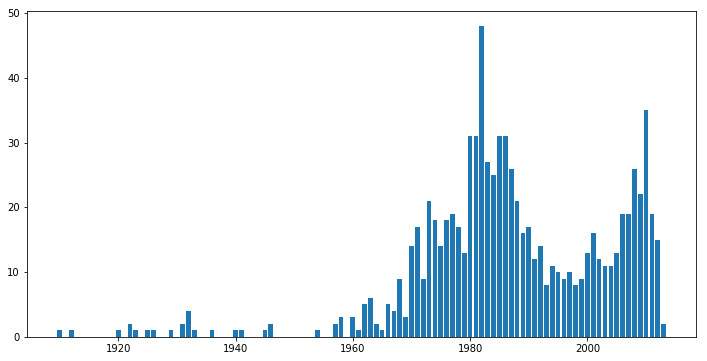

In [68]:
plt.figure(figsize=(12,6))
plt.bar(list(histogram.keys()),list(histogram.values()));